# Pre-treating data for analysis

In [1]:
repo_root = "../"
import sys
sys.path.append(repo_root)

In [6]:
#imports


import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
from parse_csv_files import parse_tiktok_comments

In [7]:
#data imports 
filename = "../data/TikTok-with-sentiments_24-11-2024_15h12.csv"
tiktok = parse_tiktok_comments(filename)
tiktok.head()



,Unnamed: 0,Comment Number (ID),Nickname,User @,User URL,Comment Text,Time,Likes,Profile Picture URL,Is 2nd Level Comment,...,difference,publisher,post_likes,post_shares,post_description,date_scraped,join_key,positive,neutral,negative
0,0,1,John Mac,johnm319,https://www.tiktok.com/@johnm319,Chartreuse pls 😭😭😭,2024-07-24,5,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,477,jaketapper,94.3K,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10,0,0.62,0.17,0.22
1,1,2,bbbo,shhhleb,https://www.tiktok.com/@shhhleb,watching them explain. I can’t breathe.,2024-07-23,21.7K,https://p16-sign-va.tiktokcdn.com/musically-ma...,No,...,477,jaketapper,94.3K,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10,1,0.56,0.17,0.27
2,2,3,Caroline Tvardy,carolinetvardy6,https://www.tiktok.com/@carolinetvardy6,Our gen z correspondent 😭😭😭😭,2024-07-23,16.5K,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,477,jaketapper,94.3K,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10,2,0.44,0.16,0.40
3,3,4,sofia,sofiam444_,https://www.tiktok.com/@sofiam444_,THEY PRINTED IT OUT😭😭😭,2024-07-23,13.2K,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,477,jaketapper,94.3K,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10,3,0.98,0.01,0.02
4,4,5,MEAGAN.with.an.A,meagan.with.an.a,https://www.tiktok.com/@meagan.with.an.a,"Me, an elder millennial, hearing “she’s brat” ...",2024-07-23,7401,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,477,jaketapper,94.3K,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10,4,0.16,0.40,0.43


In [8]:
# 10 K to 10 000 
tiktok['Likes'] = tiktok['Likes'].fillna('0')

#tiktok['Likes'] = np.where(tiktok['Likes'].notna() & tiktok['Likes'].str.endswith('K'),
#                        (tiktok['Likes'].str[:-1].astype(float)*1000),
#                       tiktok['Likes'])

def convert_likes(value):
    try:
        # Si la valeur se termine par 'K', multiplier par 1000
        if value.endswith('K'):
            return float(value[:-1]) * 1000
        # Sinon, convertir directement en float
        
        elif value.endswith('M'):
            return float(value[:-1]) * 1000000
            # Sinon, convertir directement en float
        return int(value)
    except ValueError:
        # Si la conversion échoue (valeurs comme 'abc'), retourner 0
        return 0


# Appliquer la fonction à toute la colonne
tiktok['Likes'] = tiktok['Likes'].apply(convert_likes)



tiktok['Likes'] = tiktok['Likes'].astype(int)
#tiktok['Likes'] = tiktok['Likes'].fillna(0).astype(int)
tiktok.head(2)

,Unnamed: 0,Comment Number (ID),Nickname,User @,User URL,Comment Text,Time,Likes,Profile Picture URL,Is 2nd Level Comment,...,difference,publisher,post_likes,post_shares,post_description,date_scraped,join_key,positive,neutral,negative
0,0,1,John Mac,johnm319,https://www.tiktok.com/@johnm319,Chartreuse pls 😭😭😭,2024-07-24,5,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,477,jaketapper,94.3K,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10,0,0.62,0.17,0.22
1,1,2,bbbo,shhhleb,https://www.tiktok.com/@shhhleb,watching them explain. I can’t breathe.,2024-07-23,21700,https://p16-sign-va.tiktokcdn.com/musically-ma...,No,...,477,jaketapper,94.3K,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10,1,0.56,0.17,0.27


In [9]:
tiktok['post_likes'] = tiktok['post_likes'].fillna('0')
tiktok['post_likes'] = tiktok['post_likes'].apply(convert_likes)



tiktok['post_likes'] = tiktok['post_likes'].astype(int)
#tiktok['Likes'] = tiktok['Likes'].fillna(0).astype(int)

#performins same for post_shares 
tiktok['post_shares'] = tiktok['post_shares'].fillna('0')
tiktok['post_shares'] = tiktok['post_shares'].apply(convert_likes)



tiktok['post_shares'] = tiktok['post_shares'].astype(int)

In [10]:
#deleting comments where users only identify each other (starting with @, ending with a space)
tiktok['Comment Text'] = tiktok['Comment Text'].fillna('').astype(str)

tiktok = tiktok[~tiktok['Comment Text'].str.match(r'^@\w+\s*$')]
tiktok.head()


,Unnamed: 0,Comment Number (ID),Nickname,User @,User URL,Comment Text,Time,Likes,Profile Picture URL,Is 2nd Level Comment,...,difference,publisher,post_likes,post_shares,post_description,date_scraped,join_key,positive,neutral,negative
0,0,1,John Mac,johnm319,https://www.tiktok.com/@johnm319,Chartreuse pls 😭😭😭,2024-07-24,5,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,477,jaketapper,94300,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10,0,0.62,0.17,0.22
1,1,2,bbbo,shhhleb,https://www.tiktok.com/@shhhleb,watching them explain. I can’t breathe.,2024-07-23,21700,https://p16-sign-va.tiktokcdn.com/musically-ma...,No,...,477,jaketapper,94300,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10,1,0.56,0.17,0.27
2,2,3,Caroline Tvardy,carolinetvardy6,https://www.tiktok.com/@carolinetvardy6,Our gen z correspondent 😭😭😭😭,2024-07-23,16500,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,477,jaketapper,94300,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10,2,0.44,0.16,0.40
3,3,4,sofia,sofiam444_,https://www.tiktok.com/@sofiam444_,THEY PRINTED IT OUT😭😭😭,2024-07-23,13200,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,477,jaketapper,94300,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10,3,0.98,0.01,0.02
4,4,5,MEAGAN.with.an.A,meagan.with.an.a,https://www.tiktok.com/@meagan.with.an.a,"Me, an elder millennial, hearing “she’s brat” ...",2024-07-23,7401,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,477,jaketapper,94300,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10,4,0.16,0.40,0.43


In [11]:
videos_list = tiktok['post_url'].value_counts().index
renaming_posts = {}
for i,video in enumerate(list(videos_list)):
    renaming_posts[video] = "Post " + chr(ord('A')+i)
tiktok['post_name'] = tiktok['post_url'].replace(renaming_posts)
#end exporting the correspondance to csv file between post and urls (for simplification of read)
renaming_table = pd.DataFrame(list(renaming_posts.items()), columns=['post_url', 'post_name'])

# Save the table to a CSV file
renaming_table.to_csv('post_renaming_table.csv', index=False)

# Print the table to check
print(renaming_table)

                                             post_url post_name
0   https://www.tiktok.com/@mebbytoks/video/739415...    Post A
1   https://www.tiktok.com/@thekerrywashington/vid...    Post B
2   https://www.tiktok.com/@jaketapper/video/73945...    Post C
3   https://www.tiktok.com/@schfrsgf/video/7395642...    Post D
4   https://www.tiktok.com/@athanchekas/video/7394...    Post E
5   https://www.tiktok.com/@reals.nas/video/740484...    Post F
6   https://www.tiktok.com/@em_august/video/739469...    Post G
7   https://www.tiktok.com/@kamalahq/photo/7394598...    Post H
8   https://www.tiktok.com/@anatomyofafall/video/7...    Post I
9   https://www.tiktok.com/@fallontonight/video/73...    Post J
10  https://www.tiktok.com/@msnbc/video/7395245422...    Post K
11  https://www.tiktok.com/@kamalahq/photo/7394295...    Post L
12  https://www.tiktok.com/@billy.pickett/video/73...    Post M
13  https://www.tiktok.com/@temhota36/video/738623...    Post N
14  https://www.tiktok.com/@shitindiedis

# Measuring interactions with posts 

In [12]:
# ratio shown comments vs scraped comments

tiktok['ratio_scraped_shown'] = tiktok['scraped_comments']/tiktok['shown_comments']
tiktok['ratio_scraped_shown'].mean()
#mean value of scraped comments out of shown comments on tiktok counter - 56,93% 
tiktok['ratio_scraped_shown'].var()


base_color = "#8ACE00"
#variance is 0.0155 

## A REFAIRE CETTE PARTIE 

In [13]:
# users - groupby users to see wheher they comment several videos Count the nb of comments ?
comments_per_user = tiktok.groupby(["User @"], as_index = False).agg(nb_interactions_on_all_post = ("post_name", 'count')).sort_values(by="nb_interactions_on_all_post")
count_post_user = tiktok.groupby(["User @", "post_name"], as_index = False).agg(nb_interactions_on_post = ("post_name", 'count')).sort_values(by="nb_interactions_on_post")


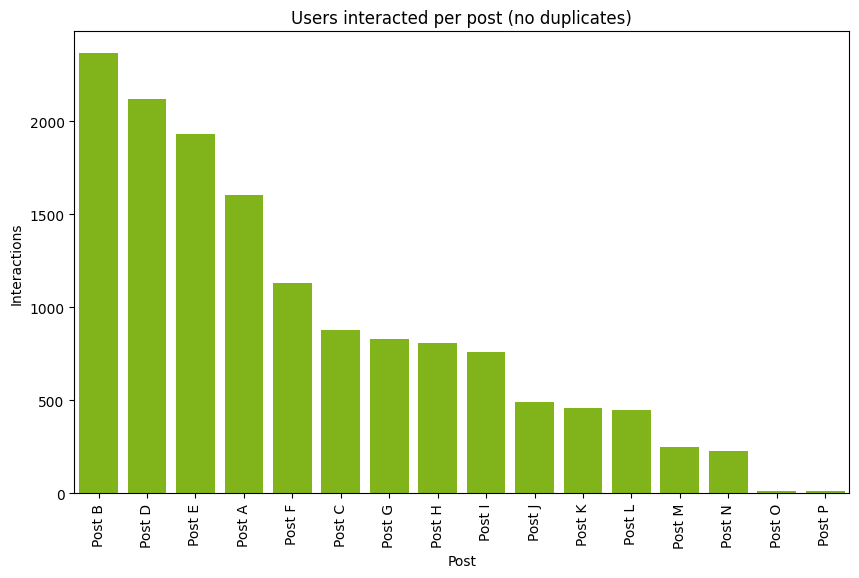

In [14]:
count_post_user.dropna()
users_per_post = count_post_user.groupby('post_name').size().reset_index()
users_per_post.rename( columns={0 :'interaction_count'}, inplace=True )


users_per_post = users_per_post.sort_values(by='interaction_count', ascending=False)



#barplotting 
plt.figure(figsize=(10, 6))
sns.barplot(x='post_name', y='interaction_count', data=users_per_post, color = base_color)
plt.xticks(rotation=90)
plt.title("Users interacted per post (no duplicates)")
plt.xlabel("Post")
plt.ylabel("Interactions")
plt.show()

Text(0, 0.5, 'Share of users that interacted with the post')

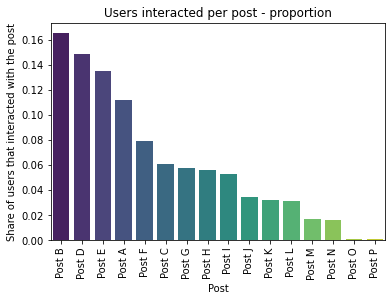

In [ ]:

users_per_post['share_of_users'] = users_per_post['interaction_count']/sum(users_per_post['interaction_count'])
users_per_post
sns.barplot(x='post_name', y='share_of_users', data=users_per_post, palette='viridis')
plt.xticks(rotation=90)
plt.title("Users interacted per post - proportion")
plt.xlabel("Post")
plt.ylabel("Share of users that commented the post")



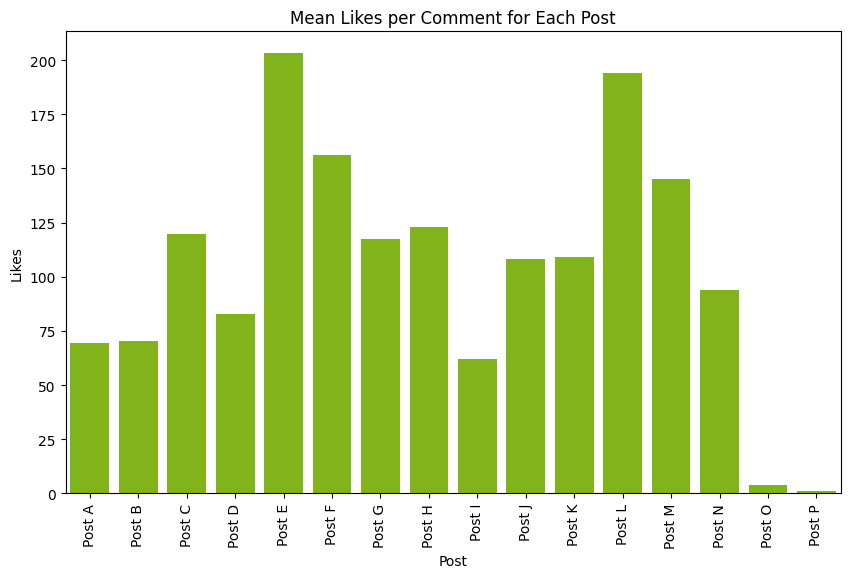

In [15]:
#mean comment likes per post 
mean_likes_per_post = tiktok.groupby('post_name')['Likes'].mean().reset_index()
mean_likes_per_post.columns = ['post_name', 'mean_likes']
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_likes_per_post, x='post_name', y='mean_likes', color = base_color)
plt.xticks(rotation=90)
plt.title('Mean Likes per Comment for Each Post')
plt.xlabel('Post')
plt.ylabel('Likes')
plt.show()

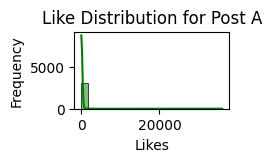

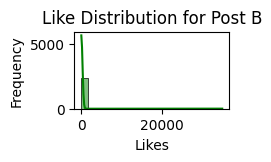

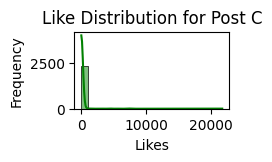

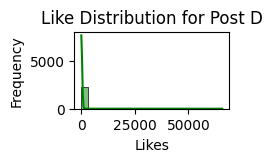

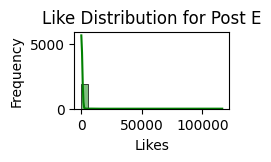

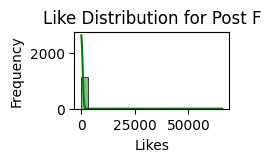

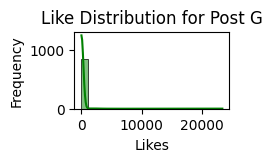

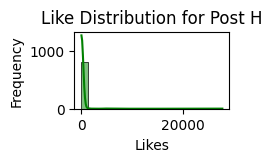

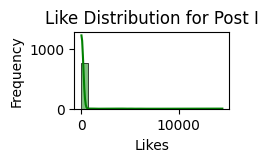

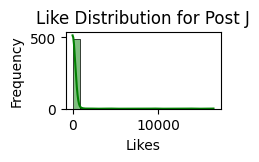

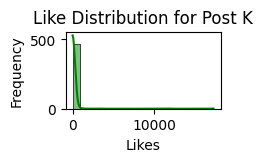

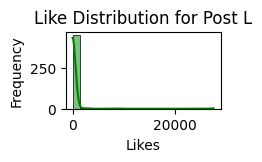

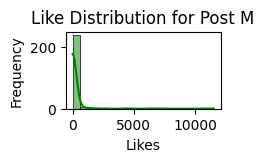

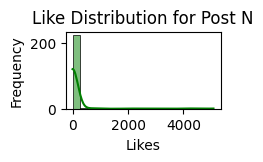

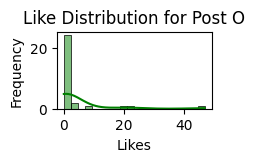

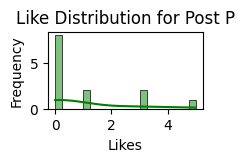

In [16]:
unique_posts = sorted(tiktok['post_name'].unique())


for post in unique_posts:
    post_likes = tiktok[tiktok['post_name'] == post]['Likes']
    
    plt.figure(figsize=(2, 1))
    sns.histplot(post_likes, bins=20, kde=True, color='green')
    plt.title(f'Like Distribution for {post}')
    plt.xlabel('Likes')
    plt.ylabel('Frequency')
    plt.show()

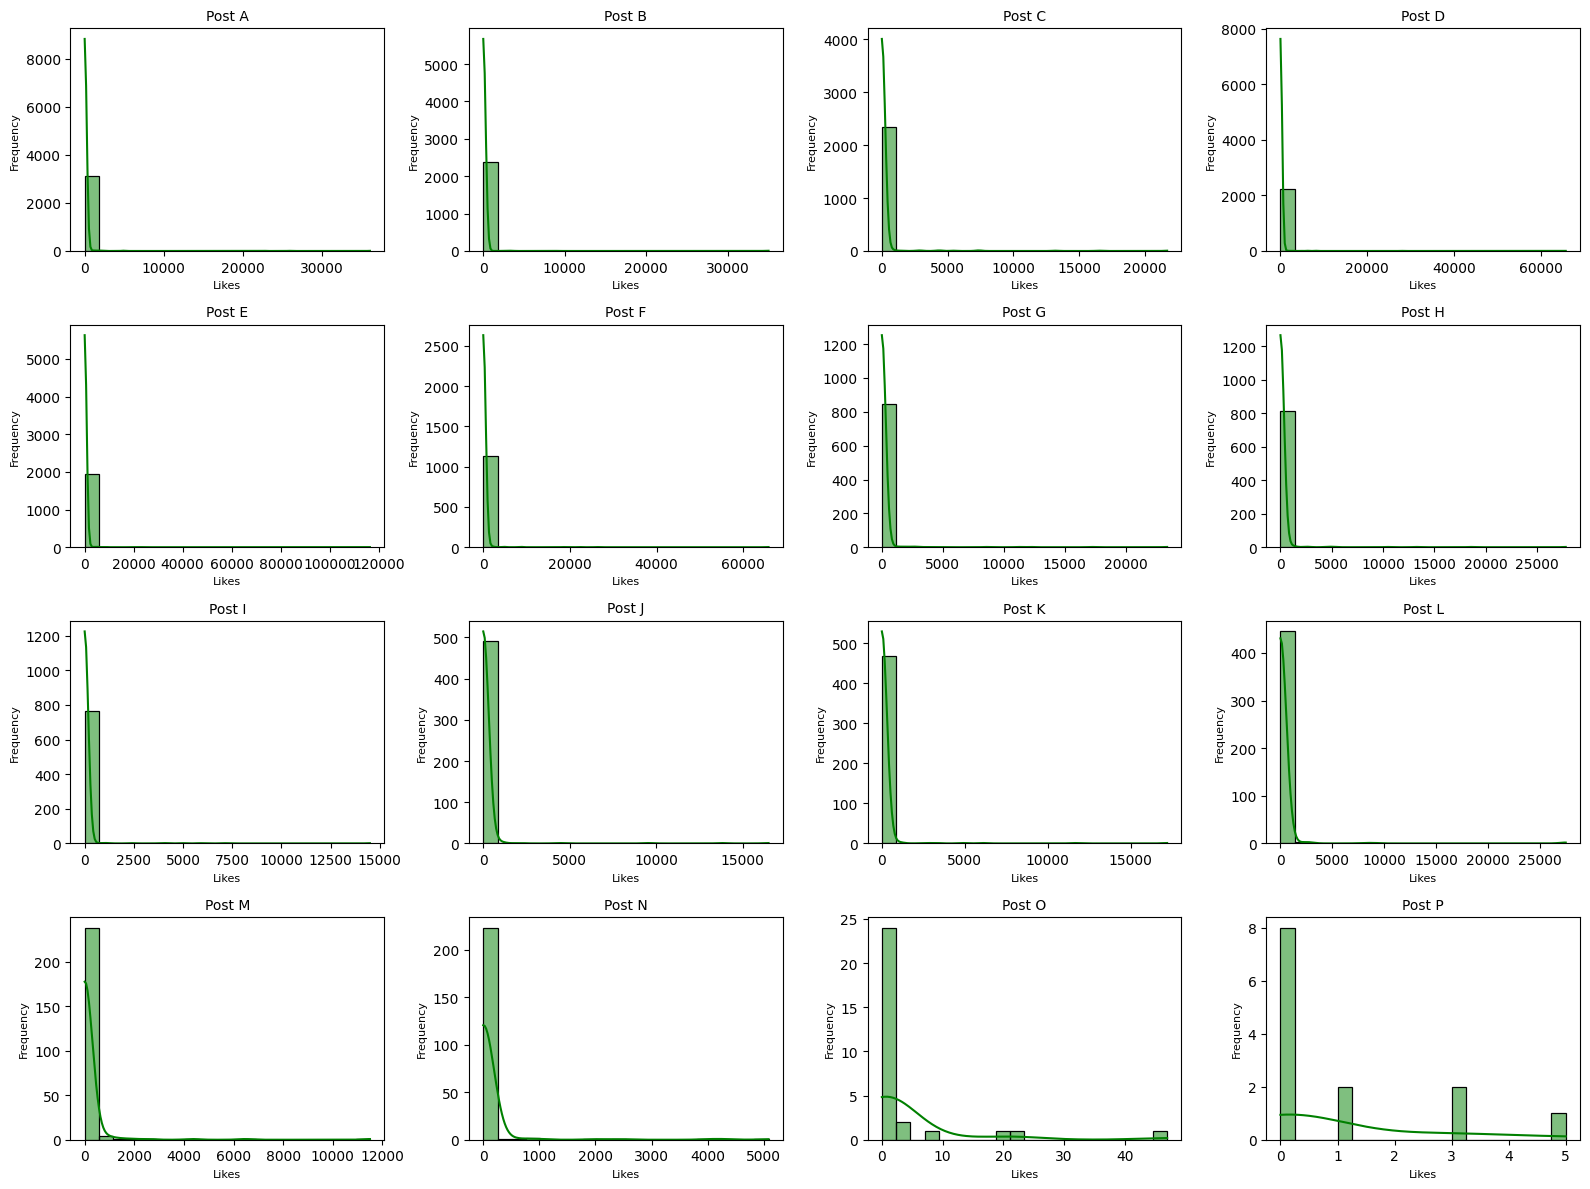

In [17]:
fig, axes = plt.subplots(4, 4, figsize=(16, 12))  # Adjust size as needed
axes = axes.flatten()  # Flatten to easily iterate over the axes

# Plot histograms for each post
for i, post in enumerate(unique_posts):
    ax = axes[i]
    post_likes = tiktok[tiktok['post_name'] == post]['Likes']
    
    sns.histplot(post_likes, bins=20, kde=True, color='green', ax=ax)
    ax.set_title(f'{post}', fontsize=10)  # Add post name as title
    ax.set_xlabel('Likes', fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)

# Remove extra subplots (if any)
for j in range(len(unique_posts), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for clarity
plt.tight_layout()

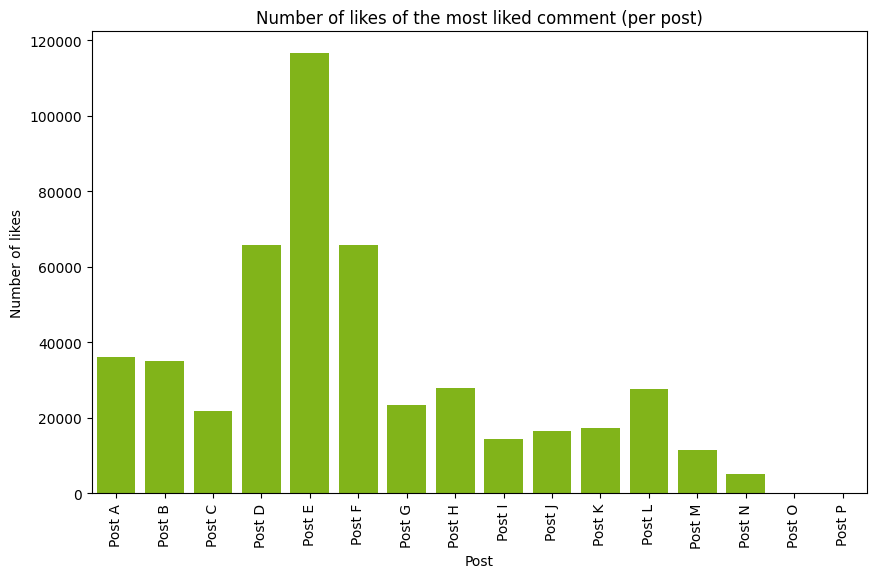

In [18]:
#Max likes per comment for each post : 

max_likes_per_post = tiktok.groupby('post_name')['Likes'].max().reset_index()
max_likes_per_post.columns = ['post_name', 'max_likes']

brat_color = sns.dark_palette(base_color, n_colors=2)[1]
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=max_likes_per_post, x='post_name', y='max_likes', color=brat_color)
plt.xticks(rotation=90)
plt.title('Number of likes of the most liked comment (per post)')
plt.xlabel('Post')
plt.ylabel('Number of likes')
plt.show()

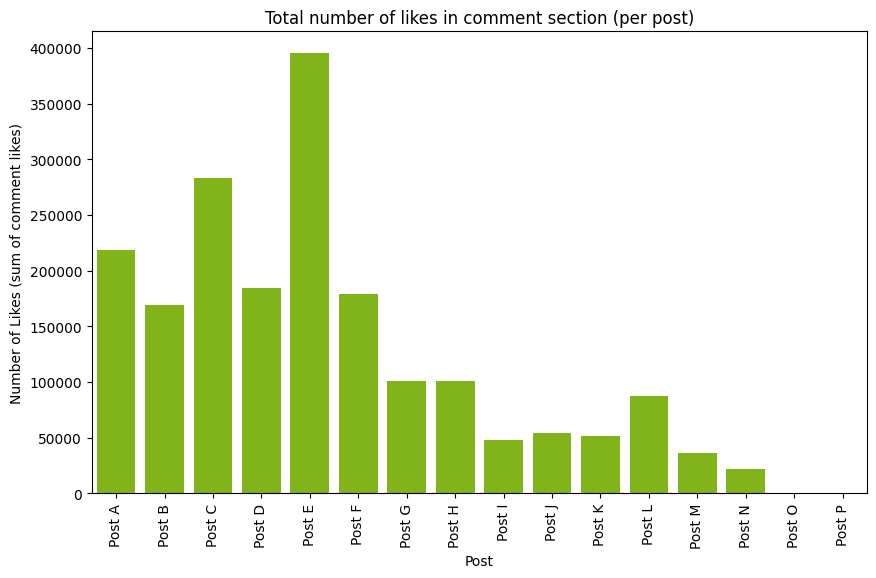

In [20]:
# Total likes in comments per post 
tot_likes_per_post = tiktok.groupby('post_name')['Likes'].sum().reset_index()
tot_likes_per_post.columns = ['post_name', 'tot_likes']
plt.figure(figsize=(10, 6))
sns.barplot(data=tot_likes_per_post, x='post_name', y='tot_likes',  color=brat_color)
plt.xticks(rotation=90)
plt.title('Total number of likes in comment section (per post)')
plt.xlabel('Post')
plt.ylabel('Number of Likes (sum of comment likes)')
plt.show()

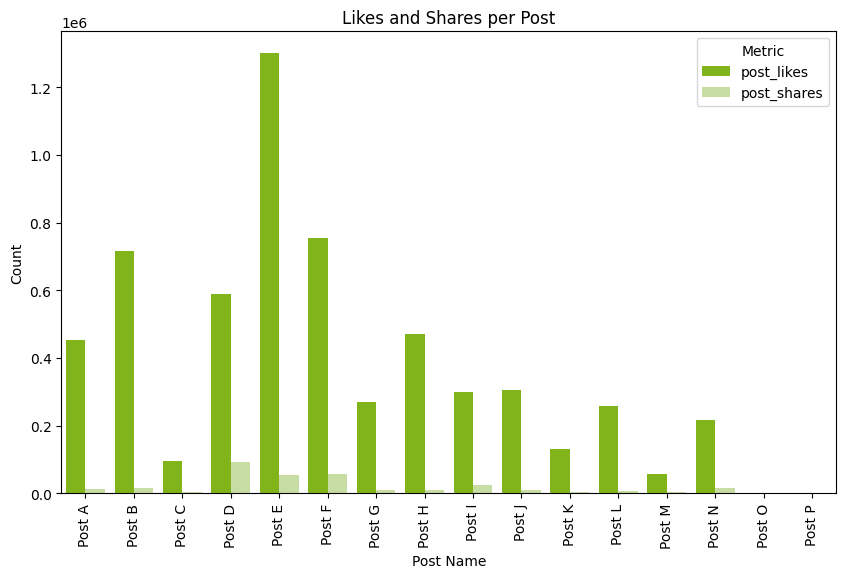

In [21]:
# Total likes & shares OF the post
 

#create a daaframe with post_name and post_likes and post_shares (1 row per post)
posts_summary = tiktok[['post_name', 'post_likes', 'post_shares']].drop_duplicates()
posts_summary.sort_values('post_name', inplace = True)
posts_summary
#passing to long format 
posts_long = posts_summary.melt(id_vars='post_name', var_name='Metric', value_name='Total')


lighter_shade = sns.light_palette(base_color, n_colors=4)[1]  # Slightly less light
darker_shade = sns.dark_palette(base_color, n_colors=2)[1]
custom_palette = [ darker_shade, lighter_shade]
# Map the palette to the words
brat_palette = dict(zip(posts_long['Metric'].unique(), custom_palette))
plt.figure(figsize=(10, 6))
sns.barplot(data=posts_long, x='post_name', y='Total', hue='Metric', palette=brat_palette)
plt.title('Likes and Shares per Post')
plt.xlabel('Post Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Metric')


# Plotting both 


C:\Users\Dasha\AppData\Local\Temp\ipykernel_31284\328776951.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=posts_summary, x='post_name', y='post_likes',  palette = palette)
C:\Users\Dasha\AppData\Local\Temp\ipykernel_31284\328776951.py:9: UserWarning: The palette list has more values (17) than needed (16), which may not be intended.
  sns.barplot(data=posts_summary, x='post_name', y='post_likes',  palette = palette)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Post A'),
  Text(1, 0, 'Post B'),
  Text(2, 0, 'Post C'),
  Text(3, 0, 'Post D'),
  Text(4, 0, 'Post E'),
  Text(5, 0, 'Post F'),
  Text(6, 0, 'Post G'),
  Text(7, 0, 'Post H'),
  Text(8, 0, 'Post I'),
  Text(9, 0, 'Post J'),
  Text(10, 0, 'Post K'),
  Text(11, 0, 'Post L'),
  Text(12, 0, 'Post M'),
  Text(13, 0, 'Post N'),
  Text(14, 0, 'Post O'),
  Text(15, 0, 'Post P')])

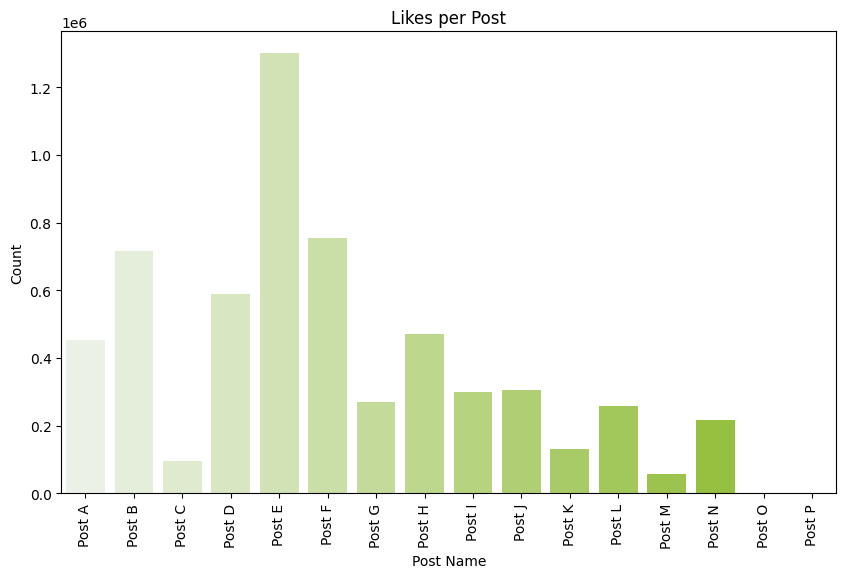

In [22]:
#Only shares and only likes - separate
norm = plt.Normalize(posts_summary['post_likes'].min(), posts_summary['post_likes'].max())

# Create a custom gradient based on the base color #8ACE00
base_color = "#8ACE00"
palette = sns.light_palette(base_color, n_colors=len(posts_summary))

plt.figure(figsize=(10, 6))
sns.barplot(data=posts_summary, x='post_name', y='post_likes',  palette = palette)
plt.title('Likes per Post')
plt.xlabel('Post Name')
plt.ylabel('Count')
plt.xticks(rotation=90)


C:\Users\Dasha\AppData\Local\Temp\ipykernel_31284\1858555183.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=posts_summary, x='post_name', y='post_shares', palette=palette)
C:\Users\Dasha\AppData\Local\Temp\ipykernel_31284\1858555183.py:2: UserWarning: The palette list has more values (17) than needed (16), which may not be intended.
  sns.barplot(data=posts_summary, x='post_name', y='post_shares', palette=palette)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Post A'),
  Text(1, 0, 'Post B'),
  Text(2, 0, 'Post C'),
  Text(3, 0, 'Post D'),
  Text(4, 0, 'Post E'),
  Text(5, 0, 'Post F'),
  Text(6, 0, 'Post G'),
  Text(7, 0, 'Post H'),
  Text(8, 0, 'Post I'),
  Text(9, 0, 'Post J'),
  Text(10, 0, 'Post K'),
  Text(11, 0, 'Post L'),
  Text(12, 0, 'Post M'),
  Text(13, 0, 'Post N'),
  Text(14, 0, 'Post O'),
  Text(15, 0, 'Post P')])

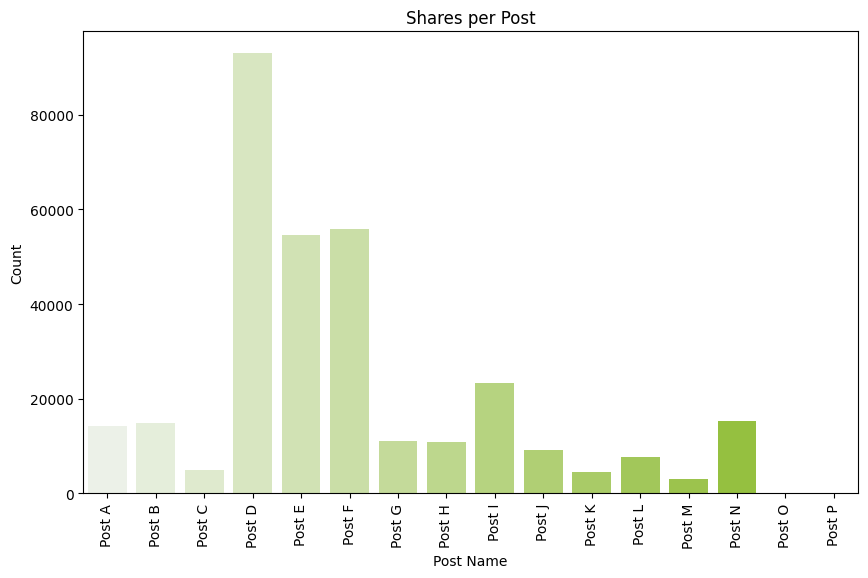

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(data=posts_summary, x='post_name', y='post_shares', palette=palette)
plt.title('Shares per Post')
plt.xlabel('Post Name')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Analysis of comments - and what they contain per post

In [ ]:
# Proportion de commentaires avec les emojis (barchart? piechart?)



In [ ]:
# NB OF USERS 
# COMMENT LENGTH 
# NB DE LIKES EN MOYENNE PAR POST PAR COM 
 
# PROPORTION DES COMS AVEC DES EMOJIS 
# COMS SEULEMENT AVEC EMOJIS / EMOJIS ET IDENTIFICATIONS 
# FAIRE DES BINS AVEC NB DE LIKES ? 

#nb de commentaires qui contiennent brat 
#nb de commentaires content kamala 
#nb de coms contenant trump/republican 


In [57]:
# contains 
tiktok['contains_brat'] = tiktok['Comment Text'].str.contains('brat', case = False, regex=True)
tiktok['contains_kamala'] = tiktok['Comment Text'].str.contains('kamala', case = False, regex=True)
tiktok['contains_trump'] = tiktok['Comment Text'].str.contains('trump', case = False, regex=True)
tiktok['contains_politics'] = tiktok['Comment Text'].str.contains('politic', case = False, regex=True)
tiktok['contains_democrat']= tiktok['Comment Text'].str.contains('democrat', case = False, regex=True)
tiktok['contains_republican'] = tiktok['Comment Text'].str.contains('republican', case = False, regex=True)

# politics
tiktok['contains_registration'] = tiktok['Comment Text'].str.contains('registration', case = False, regex=True)
tiktok['contains_vote'] = tiktok['Comment Text'].str.contains('vote', case = False, regex=True)
tiktok['contains_election'] = tiktok['Comment Text'].str.contains('election', case = False, regex=True)
tiktok['contains_donation'] = tiktok['Comment Text'].str.contains('donation', case = False, regex=True)


#Israel / Palestine 
tiktok['contains_isr'] = tiktok['Comment Text'].str.contains('Israel', case = False, regex=True)
tiktok['contains_pal'] = tiktok['Comment Text'].str.contains('Palestine', case = False, regex=True)
tiktok['contains_gaza'] = tiktok['Comment Text'].str.contains('Gaza', case = False, regex=True)




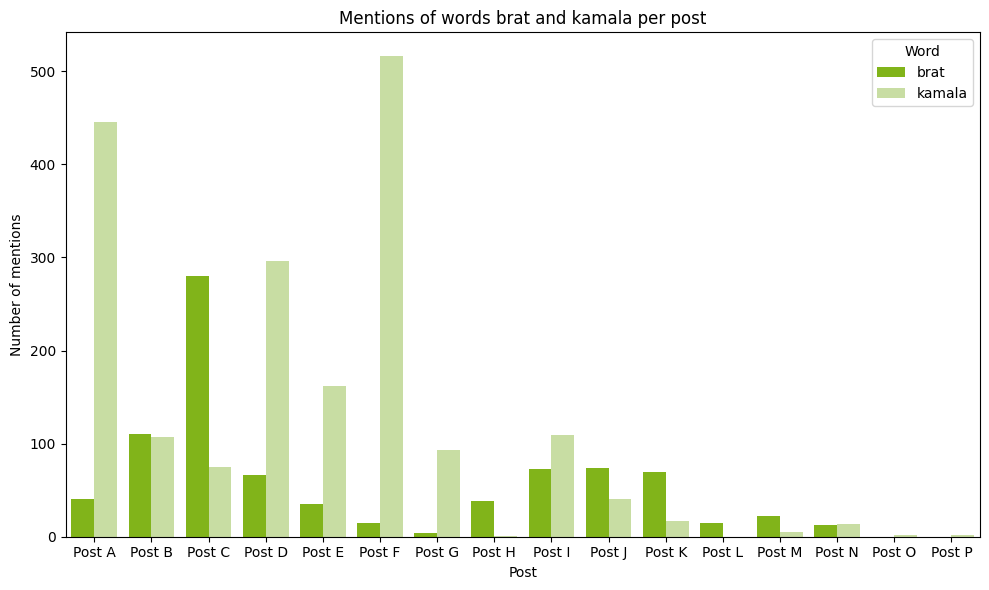

In [25]:
mentions = tiktok.groupby('post_name')[['contains_brat', 'contains_kamala']].sum()

# Passer en colonnes pour un tracé simultané
mentions.reset_index(inplace=True)

# Visualisation avec sns.barplot
mentions_long = mentions.melt(id_vars='post_name', var_name='word', value_name='mentions')

# Renommer les mots pour plus de clarté
mentions_long['word'] = mentions_long['word'].str.replace('contains_', '')


base_color = "#8ACE00"
lighter_shade = sns.light_palette(base_color, n_colors=4)[1]  # Slightly less light
darker_shade = sns.dark_palette(base_color, n_colors=2)[1]
custom_palette = [ darker_shade, lighter_shade]
# Map the palette to the words
word_palette = dict(zip(mentions_long['word'].unique(), custom_palette))

# Tracé du graphique
plt.figure(figsize=(10,6), facecolor='w')
sns.barplot(
    data=mentions_long,
    x='post_name',
    y='mentions',
    hue='word',
    palette=word_palette
)
plt.title('Mentions of words brat and kamala per post')
plt.xlabel('Post')
plt.ylabel('Number of mentions')
plt.legend(title='Word')
plt.tight_layout()
plt.savefig('../viz/brat_kamala_per_post.png',bbox_inches='tight', transparent=False, dpi=300)

C:\Users\Dasha\AppData\Local\Temp\ipykernel_31284\1001977084.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


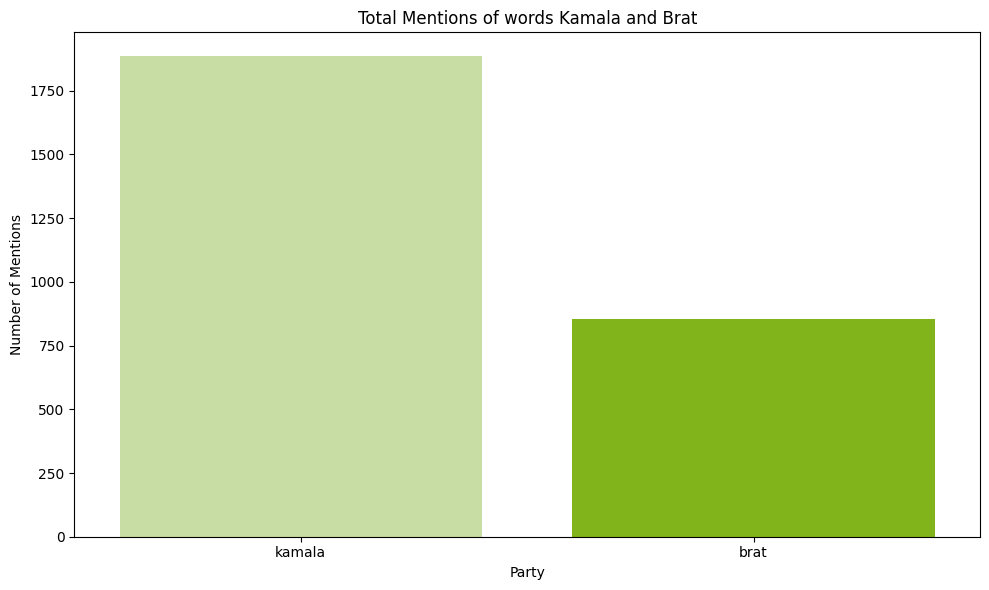

In [26]:
#total mentions in the dataset
overall_mentions_k = tiktok[['contains_kamala', 'contains_brat']].sum().reset_index()
overall_mentions_k.columns = ['word', 'mentions']

overall_mentions_k['word'] = overall_mentions_k['word'].str.replace('contains_', '')
plt.figure(figsize=(10,6), facecolor='w')
sns.barplot(
    data=overall_mentions_k,
    x='word',
    y='mentions',
    palette=[lighter_shade, darker_shade]  
)
plt.title('Total Mentions of words Kamala and Brat')
plt.xlabel('Party')
plt.ylabel('Number of Mentions')
plt.tight_layout()
plt.savefig('../viz/tot_ment_kamala_brat.png',bbox_inches='tight', transparent=False, dpi=300)


C:\Users\Dasha\AppData\Local\Temp\ipykernel_31284\2515870590.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


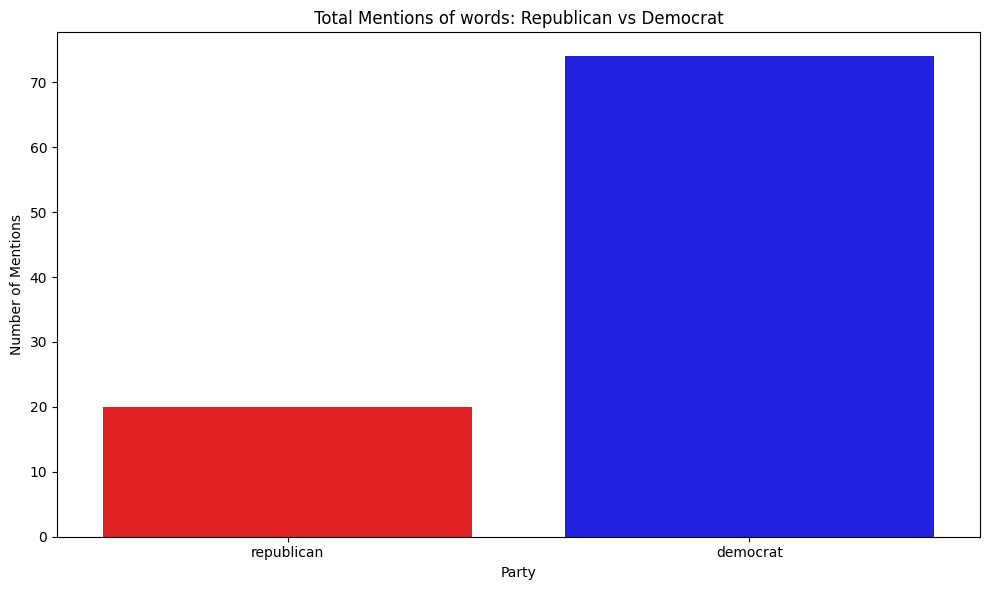

In [27]:
#mentions democrat vs republican in total 
overall_mentions = tiktok[['contains_republican', 'contains_democrat']].sum().reset_index()
overall_mentions.columns = ['party', 'mentions']

overall_mentions['party'] = overall_mentions['party'].str.replace('contains_', '')
plt.figure(figsize=(10,6), facecolor='w')
sns.barplot(
    data=overall_mentions,
    x='party',
    y='mentions',
    palette=['red', 'blue']  # Red for republican, blue for democrat
)
plt.title('Total Mentions of words: Republican vs Democrat')
plt.xlabel('Party')
plt.ylabel('Number of Mentions')
plt.tight_layout()
plt.savefig('../viz/tot_ment_rep_dem.png',bbox_inches='tight', transparent=False, dpi=300)

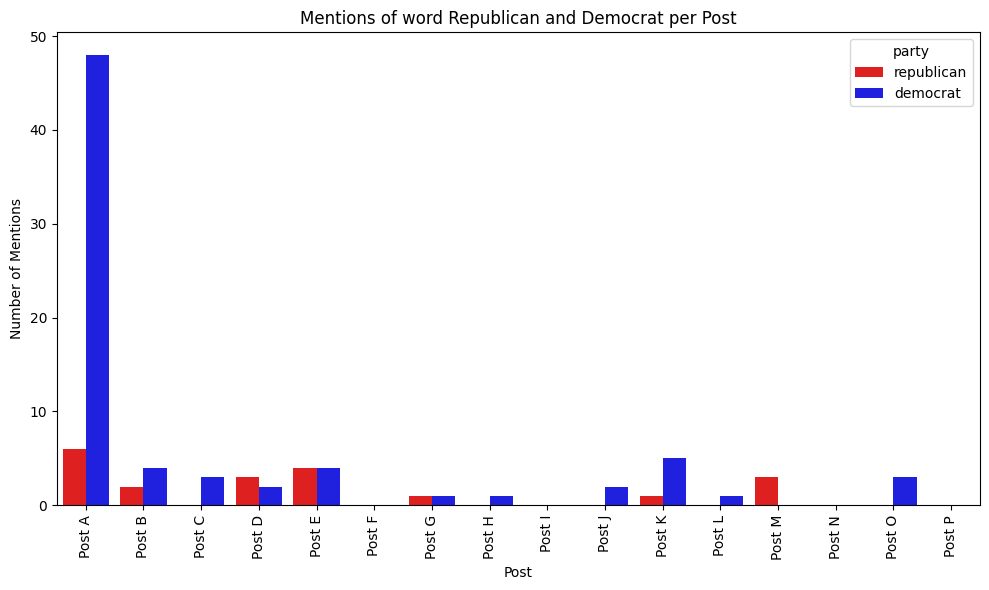

In [28]:
#mentions democrat vs republican per post 

rep_dem_mentions = tiktok.groupby('post_name')[['contains_republican', 'contains_democrat']].sum().reset_index()

# Melt to long format for easier plotting
rep_dem_mentions_long = rep_dem_mentions.melt(
    id_vars='post_name',
    var_name='party',
    value_name='mentions'
)

# Clean column names for better visualization
rep_dem_mentions_long['party'] = rep_dem_mentions_long['party'].str.replace('contains_', '')
plt.figure(figsize=(10,6), facecolor='w')
sns.barplot(
    data=rep_dem_mentions_long,
    x='post_name',
    y='mentions',
    hue='party',
    palette={'republican': 'red', 'democrat': 'blue'}
)
plt.title('Mentions of word Republican and Democrat per Post')
plt.xlabel('Post')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('../viz/per_post_rep_dem.png',bbox_inches='tight', transparent=False, dpi=300)
 

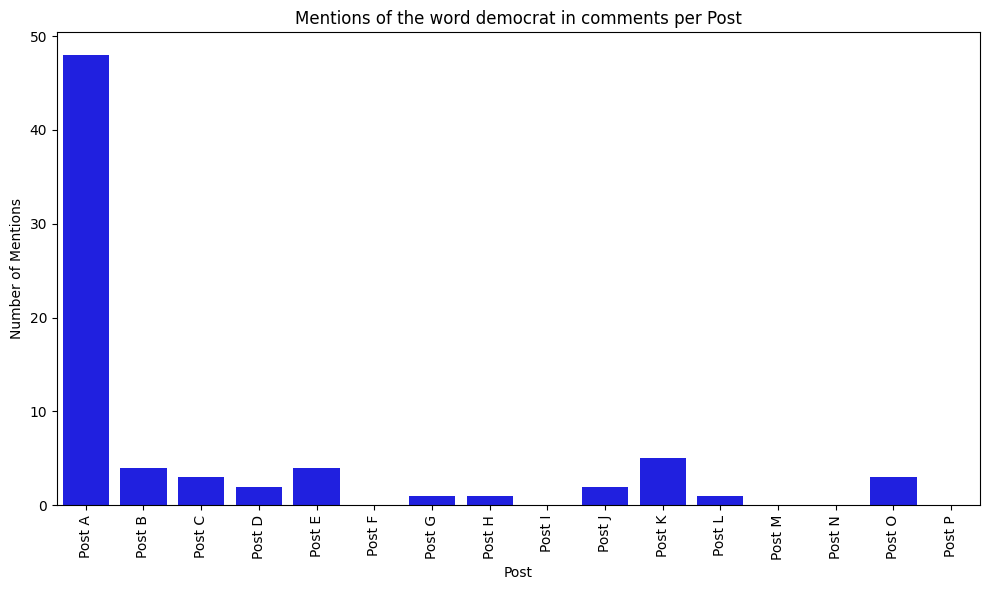

In [29]:
#mentions of democrat per post 

demo_mentions_per_post = tiktok.groupby('post_name')['contains_democrat'].sum().reset_index()
demo_mentions_per_post.columns = ['post_name', 'mentions']
plt.figure(figsize=(10,6), facecolor='w')
sns.barplot(
    data=demo_mentions_per_post,
    x='post_name',
    y='mentions',
    color='blue'  # Single color for politics
)
plt.title('Mentions of the word democrat in comments per Post')
plt.xlabel('Post')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('../viz/per_post_dem.png',bbox_inches='tight', transparent=False, dpi=300)


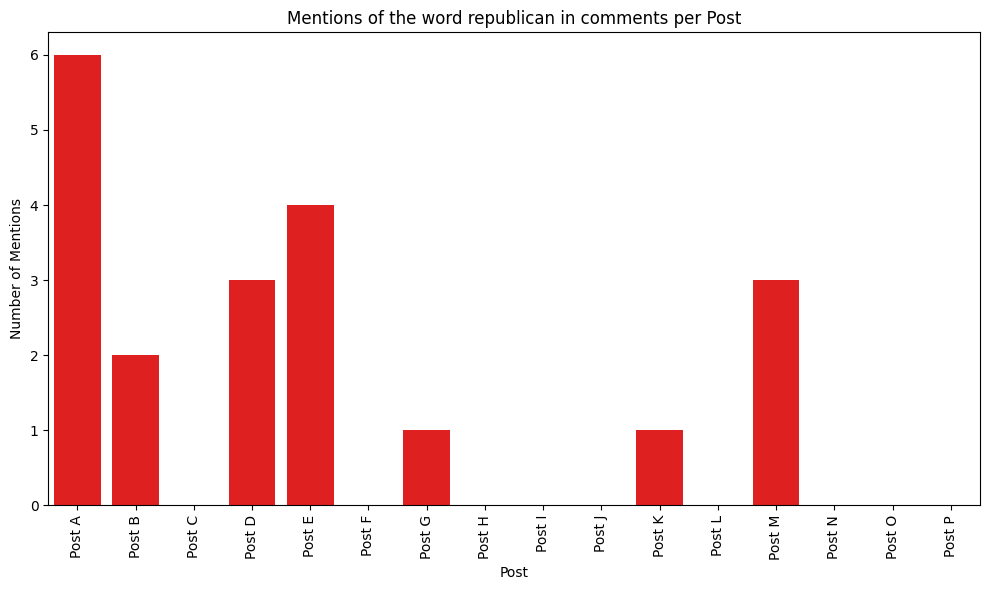

In [30]:
#mentions of republican per post 
rep_mentions_per_post = tiktok.groupby('post_name')['contains_republican'].sum().reset_index()
rep_mentions_per_post.columns = ['post_name', 'mentions']
plt.figure(figsize=(10,6), facecolor='w')
sns.barplot(
    data=rep_mentions_per_post,
    x='post_name',
    y='mentions',
    color='red'  # Single color for politics
)
plt.title('Mentions of the word republican in comments per Post')
plt.xlabel('Post')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('../viz/per_post_rep.png',bbox_inches='tight', transparent=False, dpi=300)

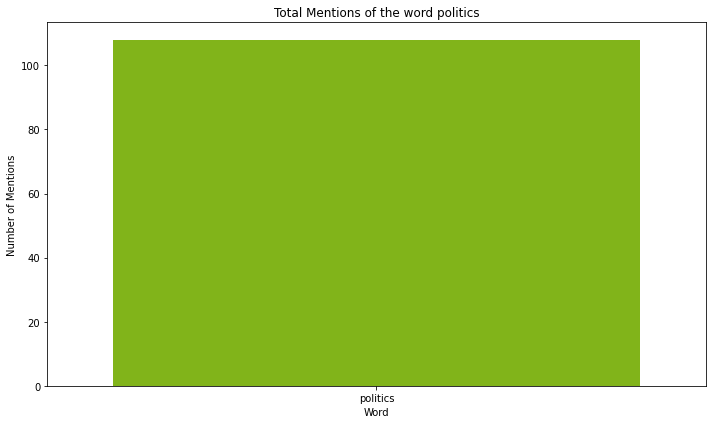

In [109]:
#mentions of politics in total
total_politics_mentions = tiktok['contains_politics'].sum()
politics_mentions_df = pd.DataFrame({'category': ['politics'], 'mentions': [total_politics_mentions]})
plt.figure(figsize=(10,6), facecolor='w')
sns.barplot(
    data=politics_mentions_df,
    x='category',
    y='mentions',
    color=base_color  # Single color for politics
)
plt.title('Total Mentions of the word politics')
plt.xlabel("Word")
plt.ylabel('Number of Mentions')
plt.tight_layout()
plt.savefig('../viz/tot_ment_politics.png',bbox_inches='tight', transparent=False, dpi=300)

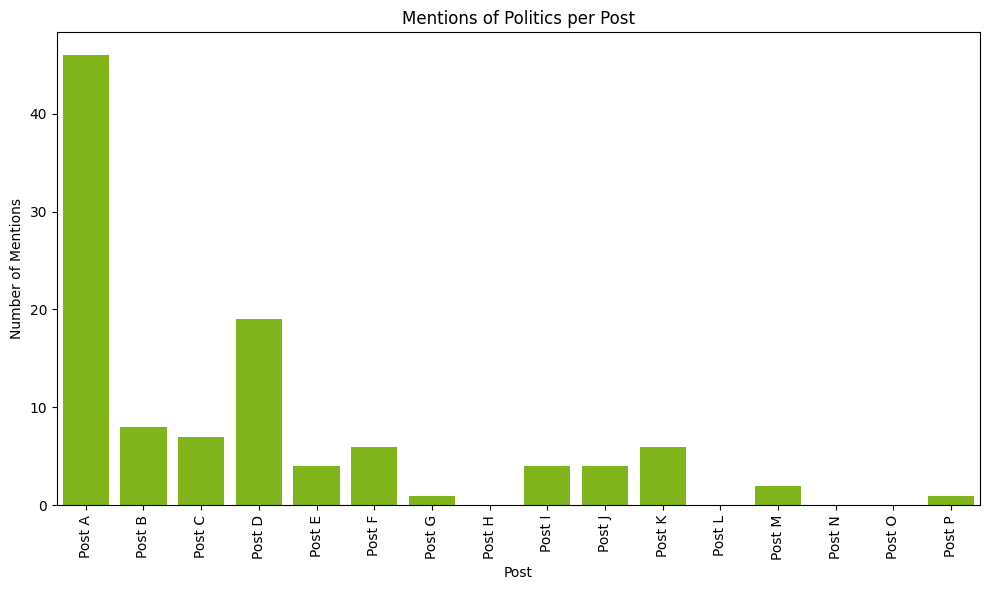

In [31]:
#mentions of politics per post 
politics_mentions_per_post = tiktok.groupby('post_name')['contains_politics'].sum().reset_index()
politics_mentions_per_post.columns = ['post_name', 'mentions']

plt.figure(figsize=(10,6), facecolor='w')
sns.barplot(
    data=politics_mentions_per_post,
    x='post_name',
    y='mentions',
    color=base_color  # Single color for politics
)
plt.title('Mentions of Politics per Post')
plt.xlabel('Post')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('../viz/per_post_politics.png',bbox_inches='tight', transparent=False, dpi=300)

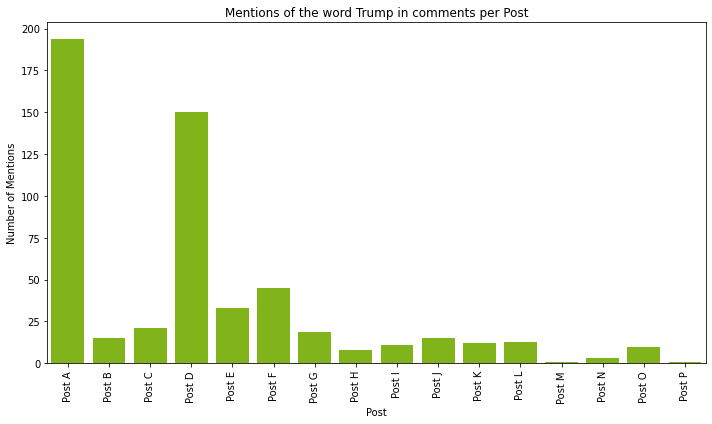

In [111]:
#mentions of democrat per post 

trump_mentions_per_post = tiktok.groupby('post_name')['contains_trump'].sum().reset_index()
trump_mentions_per_post.columns = ['post_name', 'mentions']

plt.figure(figsize=(10,6), facecolor='w')
sns.barplot(
    data=trump_mentions_per_post,
    x='post_name',
    y='mentions',
    color=base_color  # Single color for politics
)
plt.title('Mentions of the word Trump in comments per Post')
plt.xlabel('Post')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('../viz/per_post_trump.png',bbox_inches='tight', transparent=False, dpi=300)

## Political engagement stats

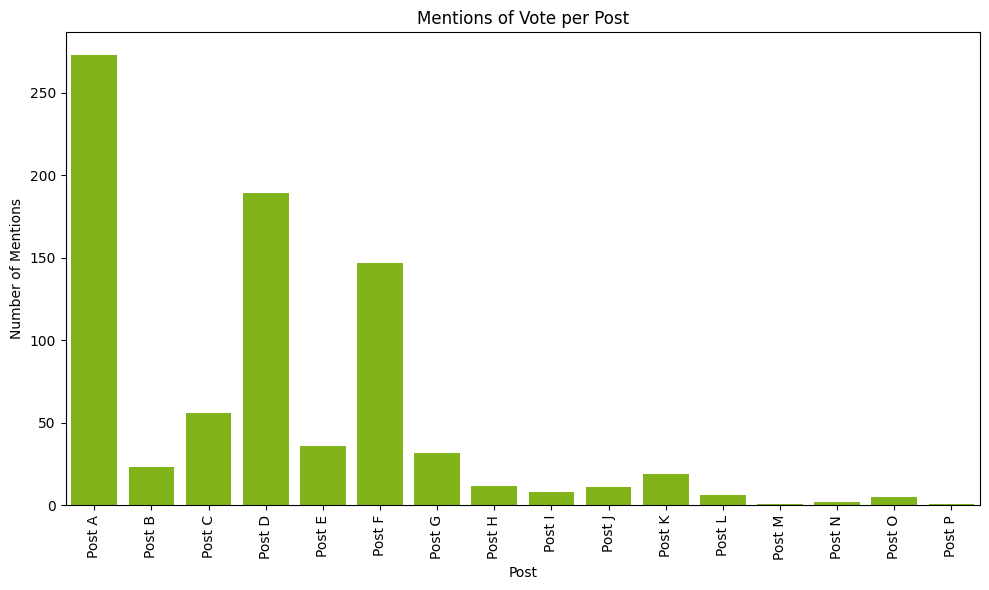

In [33]:
#mentions of politics per post 
vote_mentions_per_post = tiktok.groupby('post_name')['contains_vote'].sum().reset_index()
vote_mentions_per_post.columns = ['post_name', 'mentions']

plt.figure(figsize=(10,6), facecolor='w')
sns.barplot(
    data=vote_mentions_per_post,
    x='post_name',
    y='mentions',
    color=base_color  # Single color for politics
)
plt.title('Mentions of Vote per Post')
plt.xlabel('Post')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('../viz/per_post_vote.png',bbox_inches='tight', transparent=False, dpi=300)

In [54]:
tiktok.dtypes

Unnamed: 0                        int64
Comment Number (ID)               int64
Nickname                         object
User @                           object
User URL                         object
Comment Text                     object
Time                     datetime64[ns]
Likes                             int64
Profile Picture URL              object
Is 2nd Level Comment             object
User Replied To                  object
Number of Replies                 int64
post_url                         object
shown_comments                    int64
scraped_comments                  int64
difference                        int64
publisher                        object
post_likes                        int64
post_shares                       int64
post_description                 object
date_scraped             datetime64[ns]
join_key                          int64
positive                        float64
neutral                         float64
negative                        float64


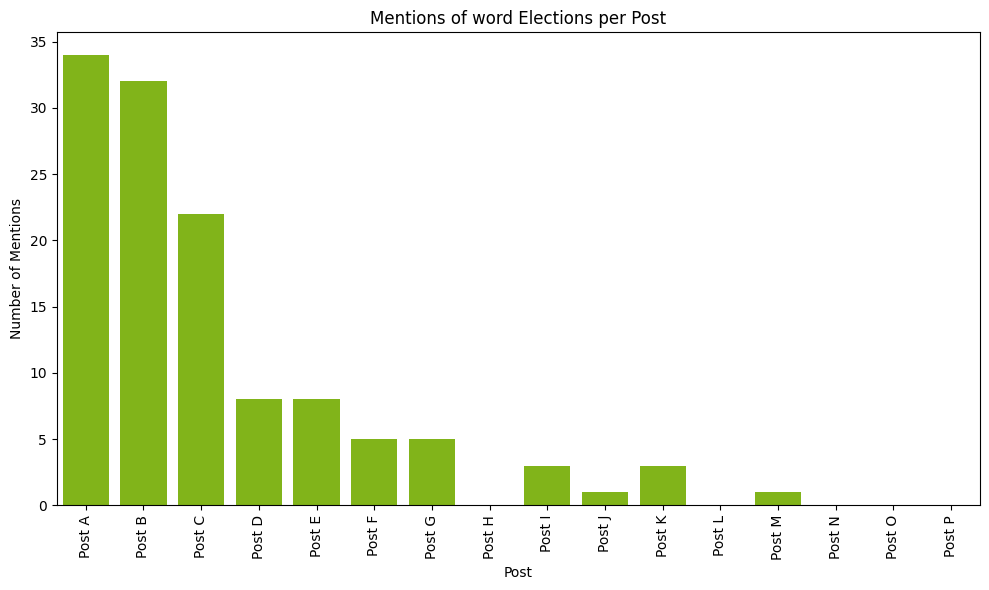

In [55]:
#mentions of politics per post 
election_mentions_per_post = tiktok.groupby('post_name')['contains_election'].sum().reset_index()
election_mentions_per_post.columns = ['post_name', 'mentions']

plt.figure(figsize=(10,6), facecolor='w')
sns.barplot(
    data=election_mentions_per_post,
    x='post_name',
    y='mentions',
    color=base_color  # Single color for politics
)
plt.title('Mentions of word Elections per Post')
plt.xlabel('Post')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('../viz/per_post_election.png',bbox_inches='tight', transparent=False, dpi=300)

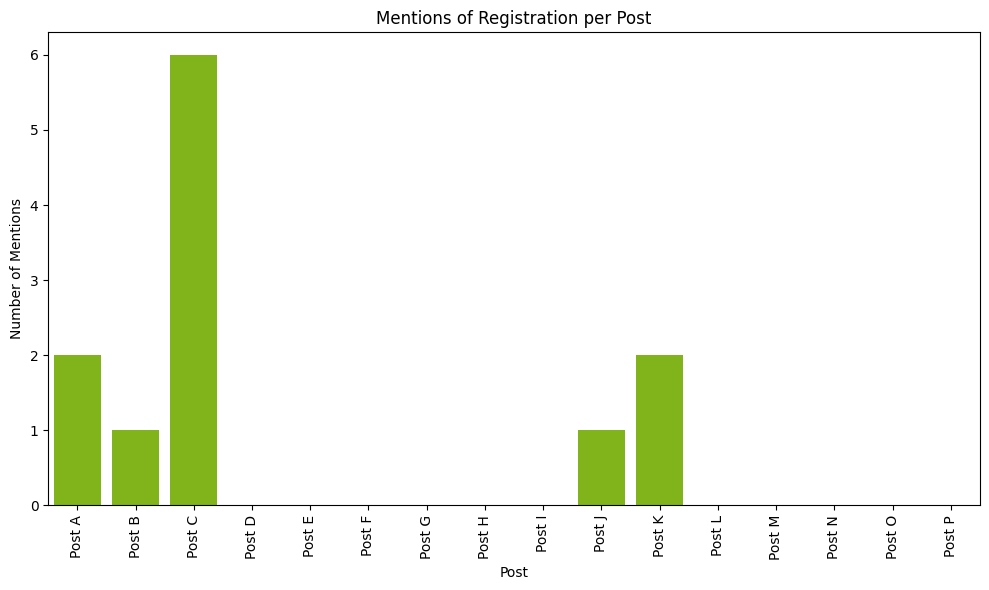

In [56]:
#mentions of politics per post 
registration_mentions_per_post = tiktok.groupby('post_name')['contains_registration'].sum().reset_index()
registration_mentions_per_post.columns = ['post_name', 'mentions']

plt.figure(figsize=(10,6), facecolor='w')
sns.barplot(
    data=registration_mentions_per_post,
    x='post_name',
    y='mentions',
    color=base_color  # Single color for politics
)
plt.title('Mentions of Registration per Post')
plt.xlabel('Post')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('../viz/per_post_registration.png',bbox_inches='tight', transparent=False, dpi=300)

In [ ]:
# mention to add : young, old, genZ, boomer, mobilization, vote,Palestine, Israel 

#mentions to add : kamala & brat (commets that contain both of these)

In [ ]:
#emoji detection 
#see open source library to do it : https://github.com/NeelShah18/emot
#!pip install emot --upgrade #run to install the package 

import emot 

 

 #en gros ça va retourner les dict. Peut-être que je peux créer une entrée 'post' pour garder les infos sur le post 


 #puis faire du matching entre les dictionnaires sur les memes clés ou créer un dataset direct ?, 


#tiktok['Comment Text'].head(1)


# TF-IDF & Wordclouds 




In [70]:

import nltk 
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("genesis")
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download('punkt_tab')


#palette for wordclouds 
n_shades = 10  # Number of shades
brat_palette = sns.dark_palette(base_color, n_colors=n_shades, reverse=True, as_cmap=True)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dasha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dasha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package genesis to
[nltk_data]     C:\Users\Dasha\AppData\Roaming\nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dasha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Dasha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Dasha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

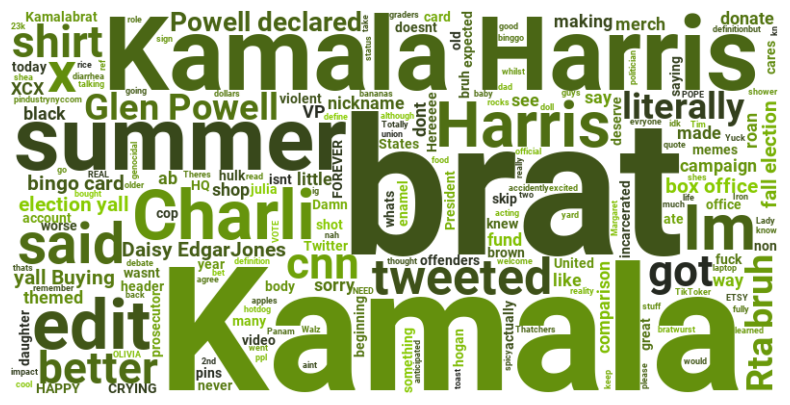

In [63]:
#word clouds for comments containing kamala & brat 

kamala_brat = tiktok[(tiktok['contains_brat'] == True) & (tiktok['contains_kamala'] == True)]
kamala_brat


stop_words = set(stopwords.words('english'))

# Fusionner tous les commentaires en un seul texte
all_comments = ' '.join(kamala_brat['Comment Text'].dropna().astype(str))
all_comments
all_comments_cleaned = re.sub(r'@[A-Za-z0-9_]+', '', all_comments)  # Remove @username
all_comments_cleaned = re.sub(r'[^\x00-\x7F]+', '', all_comments_cleaned)  # Remove non-ASCII
all_comments_cleaned = re.sub(r'[^\w\s]', '', all_comments_cleaned) 

all_comments_cleaned

font_path = '../Roboto-Bold.ttf'
wordcloud = WordCloud(
    stopwords=stop_words,
    colormap= brat_palette,
    font_path=font_path,
    background_color='white',
    width=800,
    height=400
).generate(all_comments_cleaned)

# Afficher le WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

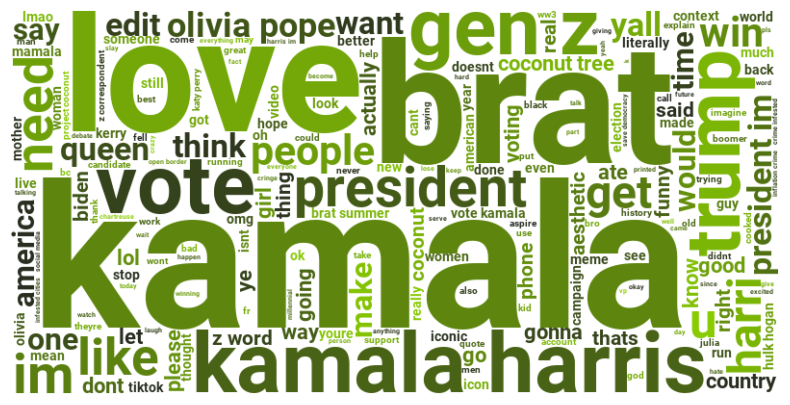

In [76]:
#on the whole dataset - hoping my computer can handle 
stop_words.add('shes')

# Fusionner tous les commentaires en un seul texte
all_comments = ' '.join(tiktok['Comment Text'].dropna().astype(str))
all_comments
all_comments_cleaned = re.sub(r'@[A-Za-z0-9_]+', '', all_comments)  # Remove @username
all_comments_cleaned = re.sub(r'[^\x00-\x7F]+', '', all_comments_cleaned)  # Remove non-ASCII
all_comments_cleaned = re.sub(r'[^\w\s]', '', all_comments_cleaned) 
all_comments_cleaned = all_comments_cleaned.lower().strip() 


font_path = '../Roboto-Bold.ttf'
wordcloud = WordCloud(
    stopwords=stop_words,
    colormap = brat_palette,
    font_path=font_path,
    background_color='white',
    width=800,
    height=400
).generate(all_comments_cleaned)

# Afficher le WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [65]:
#YOUTUBE 
filename = "../data/YouTube-with-sentiments_24-11-2024_15h52.csv"
youtube = pd.read_csv(filename)
youtube.head()



,Unnamed: 0.1,Unnamed: 0,Timestamp,Username,VideoID,Comment,Date,Modified,NbLikes,join_key,positive,neutral,negative
0,0,0,2024-11-04T16:26:49Z,@st8275,Js4qqwdjA9M,Dufus-in-chief,2024-11-04T16:26:49Z,True,1,0,0.61,0.27,0.12
1,1,1,2024-11-04T14:11:51Z,@comingforya690,Js4qqwdjA9M,I thought the liberals hate the rich? Lmfao th...,2024-11-04T14:11:51Z,True,0,1,0.10,0.10,0.80
2,2,2,2024-11-04T12:59:38Z,@2ndhk552,Js4qqwdjA9M,Who gives af,2024-11-04T12:59:38Z,True,0,2,0.11,0.14,0.76
3,3,3,2024-11-04T03:08:23Z,@___KPR,Js4qqwdjA9M,No babe we don’t need your opinion babe. Trump...,2024-11-04T03:08:23Z,True,0,3,0.68,0.28,0.04
4,4,4,2024-11-02T20:11:12Z,@cynthiabarrow509,Js4qqwdjA9M,Yeah this will sway the vote,2024-11-02T20:11:12Z,True,0,4,0.94,0.03,0.03


(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

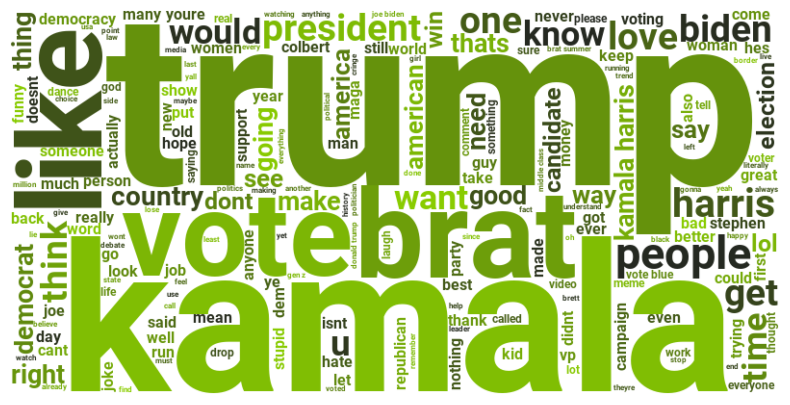

In [90]:
all_comments_yt = ' '.join(youtube['Comment'].dropna().astype(str))
all_comments_yt
#all_comments_cleaned_yt = re.sub(r'@[A-Za-z0-9_]+', '', all_comments_yt)  # Remove @username
all_comments_cleaned_yt = re.sub(r'[^\x00-\x7F]+', '', all_comments_yt)  # Remove non-ASCII
all_comments_cleaned_yt = re.sub(r'[^\w\s]', '', all_comments_cleaned_yt) 
all_comments_cleaned_yt = all_comments_cleaned_yt.lower().strip() 



wordcloud = WordCloud(
    stopwords=stop_words,
    colormap = brat_palette,
    font_path=font_path,
    background_color='white',
    width=800,
    height=400
).generate(all_comments_cleaned_yt)

# Afficher le WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [67]:
filename = "../data/Reddit-with-sentiments_24-11-2024_15h12.csv"
reddit = pd.read_csv(filename)
reddit.head()



,Unnamed: 0,username,comment_content,nb_upvotes,join_key,positive,neutral,negative
0,0,sadcapricorn35\n,Honestly I think it was really smart! It’s goi...,55,0,0.68,0.20,0.12
1,1,davidparmet\n,I love the fact that she's owning this and oth...,29,1,0.94,0.03,0.03
2,2,Tbearbean,I agree with everything others have said and w...,11,2,0.82,0.10,0.08
3,3,gshruff91,I think it could energise that youthful base w...,5,3,0.45,0.26,0.29
4,4,purplelikethesky,I think it’s a great example of what Hillary t...,5,4,0.43,0.29,0.28


(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

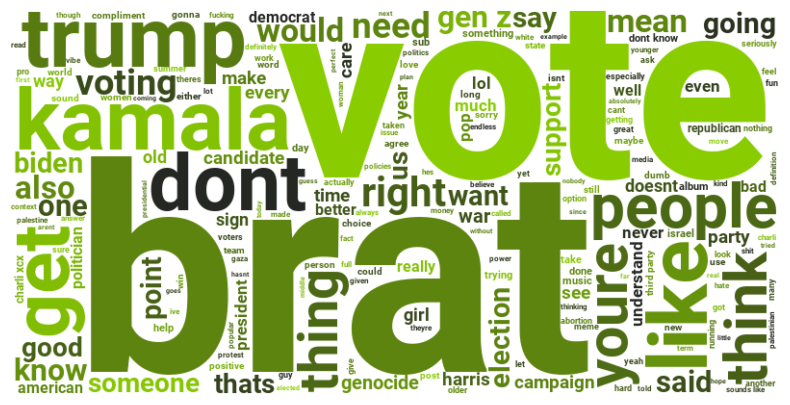

In [91]:
all_comments_rd = ' '.join(reddit['comment_content'].dropna().astype(str))

#all_comments_cleaned_rd = re.sub(r'@[A-Za-z0-9_]+', '', all_comments_yt)  # Remove @username
all_comments_cleaned_rd = re.sub(r'[^\x00-\x7F]+', '', all_comments_rd)  # Remove non-ASCII
all_comments_cleaned_rd = re.sub(r'[^\w\s]', '', all_comments_cleaned_rd) 
all_comments_cleaned_rd = all_comments_cleaned_rd.lower().strip() 



wordcloud = WordCloud(
    stopwords=stop_words,
    colormap = brat_palette,
    font_path=font_path,
    background_color='white',
    width=800,
    height=400
).generate(all_comments_cleaned_rd)

# Afficher le WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'kamala'),
  Text(1, 0, 'harris'),
  Text(2, 0, 'brat'),
  Text(3, 0, 'president'),
  Text(4, 0, 'vote'),
  Text(5, 0, 'love'),
  Text(6, 0, 'gen'),
  Text(7, 0, 'z'),
  Text(8, 0, 'trump'),
  Text(9, 0, 'like'),
  Text(10, 0, 'coconut'),
  Text(11, 0, 'olivia'),
  Text(12, 0, 'dont'),
  Text(13, 0, 'people'),
  Text(14, 0, 'get')])

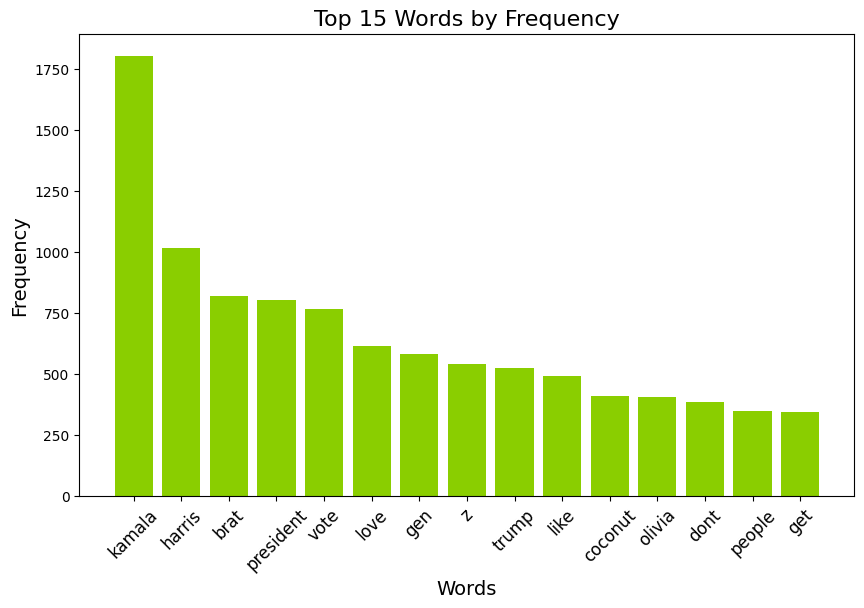

In [80]:
#For tiktok 
 
token_tk = word_tokenize(all_comments_cleaned)
token_tk

stop_words_tk= stop_words.copy()
stop_words_tk.add('im')

filtered_words_tk = [word for word in token_tk if word.lower() not in stop_words_tk]

# Calculate word frequencies
word_freq = FreqDist(filtered_words_tk)

# Get the 15 most common words
top_words = word_freq.most_common(15)

# Extract words and counts for plotting
words, counts = zip(*top_words)

# Plot the frequency of the top 15 words
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color=base_color)
plt.title("Top 15 Words by Frequency", fontsize=16)
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45, fontsize=12)

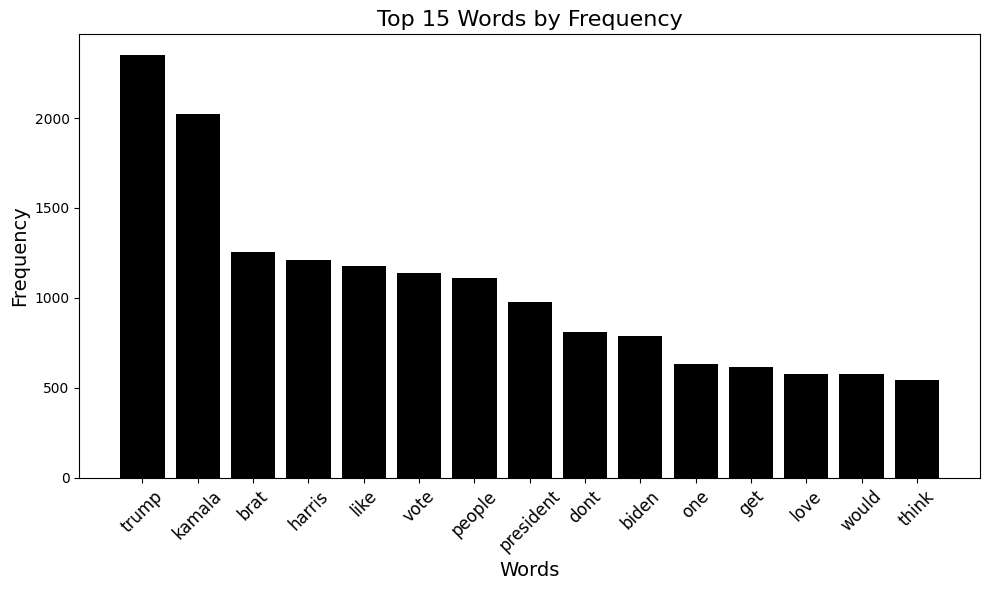

In [94]:

token_yt = word_tokenize(all_comments_cleaned_yt)
token_yt



filtered_words_yt = [word for word in token_yt if word.lower() not in stop_words]

# Calculate word frequencies
word_freq = FreqDist(filtered_words_yt)

# Get the 15 most common words
top_words = word_freq.most_common(15)

# Extract words and counts for plotting
words, counts = zip(*top_words)

# Plot the frequency of the top 15 words
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='black')
plt.title("Top 15 Words by Frequency", fontsize=16)
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45, fontsize=12)

plt.tight_layout()
plt.savefig('../viz/word_freq_yt.png',bbox_inches='tight', transparent=True, dpi=300)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'brat'),
  Text(1, 0, 'vote'),
  Text(2, 0, 'dont'),
  Text(3, 0, 'like'),
  Text(4, 0, 'trump'),
  Text(5, 0, 'kamala'),
  Text(6, 0, 'people'),
  Text(7, 0, 'get'),
  Text(8, 0, 'think'),
  Text(9, 0, 'youre'),
  Text(10, 0, 'gen'),
  Text(11, 0, 'know'),
  Text(12, 0, 'voting'),
  Text(13, 0, 'would'),
  Text(14, 0, 'party')])

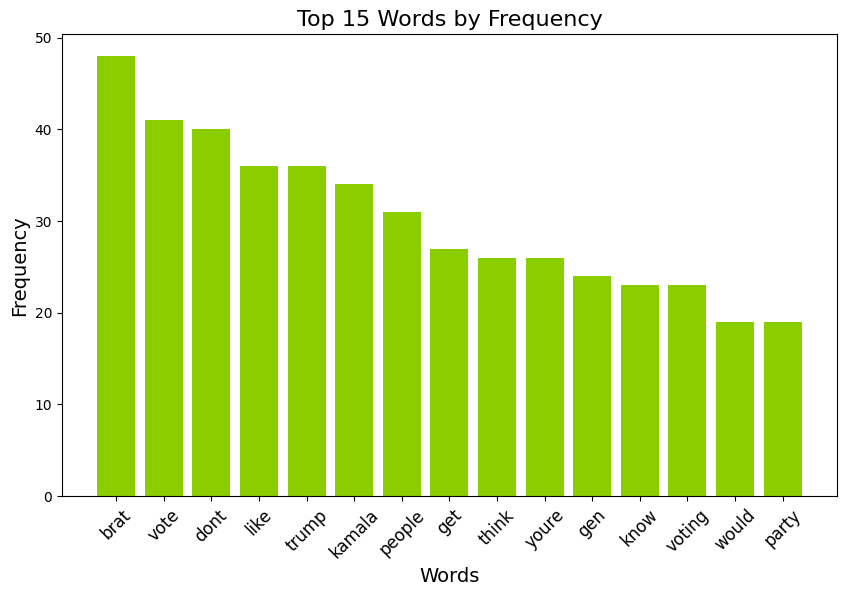

In [ ]:

token_rd = word_tokenize(all_comments_cleaned_rd)
token_rd


filtered_words_rd = [word for word in token_rd if word.lower() not in stop_words]

# Calculate word frequencies
word_freq_rd = FreqDist(filtered_words_rd)

# Get the 15 most common words
top_words_rd = word_freq_rd.most_common(15)

# Extract words and counts for plotting
words_rd, counts_rd = zip(*top_words_rd)

# Plot the frequency of the top 15 words
plt.figure(figsize=(10, 6))
plt.bar(words_rd, counts_rd, color=base_color)
plt.title("Top 15 Words by Frequency", fontsize=16)
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45, fontsize=12)




In [86]:
filtered_words_yt

['dufusinchief',
 'thought',
 'liberals',
 'hate',
 'rich',
 'lmfao',
 'thats',
 'endorse',
 'rich',
 'hollywood',
 'elites',
 'gives',
 'af',
 'babe',
 'dont',
 'need',
 'opinion',
 'babe',
 'trump',
 '2024',
 'signed',
 'latina',
 'yeah',
 'sway',
 'vote',
 'huh',
 'woman',
 'whos',
 'role',
 'djangos',
 'wife',
 'like',
 '4',
 'lines',
 'thinks',
 'relevant',
 'care',
 'opinion',
 'thank',
 'kerry',
 'love',
 'dimwit',
 'literally',
 'sang',
 'obama',
 'obama',
 'obama',
 '2008',
 'oh',
 'well',
 'dance',
 'sealed',
 'vote',
 'probably',
 'eat',
 'something',
 'cares',
 'celebrities',
 'think',
 'trenches',
 'trump2024',
 'trump',
 'cringe',
 'get',
 'dumber',
 'apple',
 'rotten',
 'right',
 'core',
 'doesnt',
 'mind',
 'woman',
 'abuser',
 'like',
 'harrisis',
 'husband',
 'doug',
 'anywhere',
 'near',
 'white',
 'house',
 'wow',
 'alamak',
 'got',
 'supporters',
 'acting',
 'weird',
 'god',
 'help',
 'cares',
 'endorsed',
 'something',
 'failed',
 'last',
 '4yrs',
 'think',
 'peop

In [ ]:
# Wordcounts pour les 15 premiers mots par dataset  

#regarder le notebook graphes_sentiment pour la propostion des mots comme vote 




#occurence - 15 mots les plus frequents 


#setiemnt analysis tiktok 


# Sentiment/Toxicity analysis plots 



In [ ]:
# EN GROS : prendre la moyenne en filtrant par 'contains_...' pour chaque score - negatif, positif ou neutre. 

,Unnamed: 0,Comment Number (ID),Nickname,User @,User URL,Comment Text,Time,Likes,Profile Picture URL,Is 2nd Level Comment,...,neutral,negative,post_name,ratio_scraped_shown,contains_brat,contains_kamala,contains_trump,contains_politics,contains_democrat,contains_republican
0,0,1,John Mac,johnm319,https://www.tiktok.com/@johnm319,Chartreuse pls 😭😭😭,2024-07-24,5,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,0.17,0.22,Post C,0.613765,False,False,False,False,False,False
1,1,2,bbbo,shhhleb,https://www.tiktok.com/@shhhleb,watching them explain. I can’t breathe.,2024-07-23,21700,https://p16-sign-va.tiktokcdn.com/musically-ma...,No,...,0.17,0.27,Post C,0.613765,False,False,False,False,False,False
2,2,3,Caroline Tvardy,carolinetvardy6,https://www.tiktok.com/@carolinetvardy6,Our gen z correspondent 😭😭😭😭,2024-07-23,16500,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,0.16,0.40,Post C,0.613765,False,False,False,False,False,False
3,3,4,sofia,sofiam444_,https://www.tiktok.com/@sofiam444_,THEY PRINTED IT OUT😭😭😭,2024-07-23,13200,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,0.01,0.02,Post C,0.613765,False,False,False,False,False,False
4,4,5,MEAGAN.with.an.A,meagan.with.an.a,https://www.tiktok.com/@meagan.with.an.a,"Me, an elder millennial, hearing “she’s brat” ...",2024-07-23,7401,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,0.40,0.43,Post C,0.613765,True,False,False,False,False,False


From Martyna's analysis : 
- Age gap is important in our study - boomers vs zoomers, confusion vs understanding of the trend?  
- often explianing the trend